In [59]:
import pandas as pd
import pickle
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [10]:
data = pd.read_csv("/Users/kumarrohit/Desktop/AQI - Prediction/data/processed/raw_dataframe.csv")
data.head()
data.rename(columns={'datetime':'Timestamp'},inplace=True)

In [11]:
data.drop("Unnamed: 0",axis=1)

,Timestamp,nh3,pm10,pm2_5,so2,o3,no2,co,aqi
0,2024-01-20 20:00:00,4.31,267.79,249.84,7.03,60.80,16.11,1214.98,5
1,2024-01-20 21:00:00,4.31,264.07,247.57,6.91,55.79,15.42,1201.63,5
2,2024-01-20 22:00:00,4.31,261.30,245.67,6.56,50.78,14.91,1201.63,5
3,2024-01-20 23:00:00,4.31,260.32,245.33,6.20,44.35,15.08,1214.98,5
4,2024-01-21 00:00:00,4.43,260.79,247.17,6.14,37.91,15.59,1228.33,5
...,...,...,...,...,...,...,...,...,...
8611,2024-07-27 15:00:00,6.14,8.87,5.72,9.89,57.22,9.34,353.81,1
8612,2024-07-27 16:00:00,6.27,10.44,6.85,11.21,54.36,10.45,360.49,1
8613,2024-07-27 17:00:00,6.14,11.54,7.70,11.09,50.78,10.88,367.16,1
8614,2024-07-27 18:00:00,5.76,11.09,7.54,9.78,47.92,10.45,367.16,1


In [16]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')
data['date'] = data['Timestamp'].dt.date

In [ ]:
daily_average = data.groupby('date').mean()[['aqi', 'pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'nh3']]
daily_average = daily_average.reset_index()

In [22]:
daily_average.shape

(365, 9)

In [23]:
daily_average.head()

,date,aqi,pm2_5,pm10,co,no2,o3,so2,nh3
0,2023-09-08,3.000000,37.227500,39.490000,664.232500,25.017500,8.225000,16.957500,1.797500
1,2023-09-09,3.000000,36.062083,40.326250,738.779167,19.871250,20.865000,14.727917,3.044583
2,2023-09-10,4.791667,108.428333,121.909167,863.671250,17.486250,59.418333,14.727083,5.576250
3,2023-09-11,5.000000,168.092500,186.558750,1215.816250,23.831667,79.363333,21.110833,7.144167
4,2023-09-12,5.000000,116.882917,127.404167,935.157083,21.599167,60.142917,21.984583,3.995000


In [24]:
daily_average.to_csv("/Users/kumarrohit/Desktop/AQI - Prediction/data/processed/averaged.csv")

In [25]:
daily_average.isnull().sum()

date     0
aqi      0
pm2_5    0
pm10     0
co       0
no2      0
o3       0
so2      0
nh3      0
dtype: int64

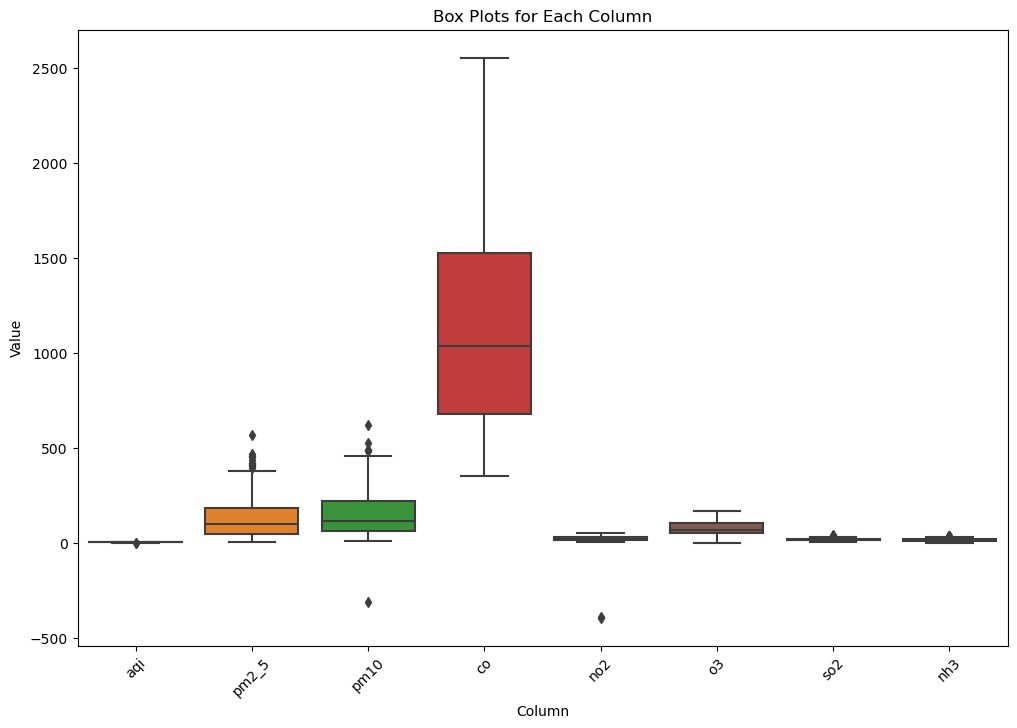

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=daily_average.iloc[:, 1:])  # Exclude 'date' column

plt.title('Box Plots for Each Column')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [37]:
df = daily_average.drop("date",axis=1)

In [40]:
X = df.drop("aqi",axis=1)
y = df['aqi']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.8)

In [47]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [57]:

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.03
R^2 Score: 0.96


In [58]:
from sklearn.model_selection import cross_validate

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply cross-validation
cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=['r2', 'neg_mean_squared_error'], return_train_score=False)

# Print the results
print(f"Cross-Validation R^2 Scores: {cv_results['test_r2']}")
print(f"Mean R^2 Score: {cv_results['test_r2'].mean():.2f}")
print(f"Standard Deviation of R^2 Scores: {cv_results['test_r2'].std():.2f}")

print(f"Cross-Validation MSE Scores: {-cv_results['test_neg_mean_squared_error']}")
print(f"Mean MSE Score: {-cv_results['test_neg_mean_squared_error'].mean():.2f}")
print(f"Standard Deviation of MSE Scores: {-cv_results['test_neg_mean_squared_error'].std():.2f}")


Cross-Validation R^2 Scores: [0.92007556 0.91900087 0.96007925 0.96440566 0.32961742]
Mean R^2 Score: 0.82
Standard Deviation of R^2 Scores: 0.25
Cross-Validation MSE Scores: [0.03224482 0.11563875 0.02843808 0.02817665 0.26158507]
Mean MSE Score: 0.09
Standard Deviation of MSE Scores: -0.09


In [61]:
filename = 'random_forest_pre.pkl'
with open(filename,'wb') as f:
    pickle.dump(model,f)